In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhadramohit/customer-shopping-latest-trends-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-shopping-latest-trends-dataset


In [6]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv('/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv')
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [8]:
data[data['Category'] == 'Outerwear']['Item Purchased'].value_counts()

,count
Item Purchased,
Jacket,163
Coat,161


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [10]:
data.shape

(3900, 19)

In [11]:
data = data.drop(['Customer ID','Item Purchased','Size','Color','Shipping Type','Payment Method'], axis=1)

In [12]:
data

,Age,Gender,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,Male,Clothing,53,Kentucky,Winter,3.1,Yes,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Clothing,64,Maine,Winter,3.1,Yes,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Clothing,73,Massachusetts,Spring,3.1,Yes,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Footwear,90,Rhode Island,Spring,3.5,Yes,Yes,Yes,49,PayPal,Weekly
4,45,Male,Clothing,49,Oregon,Spring,2.7,Yes,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Clothing,28,Virginia,Summer,4.2,No,No,No,32,Venmo,Weekly
3896,52,Female,Accessories,49,Iowa,Spring,4.5,No,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Accessories,33,New Jersey,Spring,2.9,No,No,No,24,Venmo,Quarterly
3898,44,Female,Footwear,77,Minnesota,Summer,3.8,No,No,No,24,Venmo,Weekly


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
data['Gender'] = le.fit_transform(data['Gender'])
data['Subscription Status'] = le.fit_transform(data['Subscription Status'])
data['Discount Applied'] = le.fit_transform(data['Discount Applied'])
data['Promo Code Used'] = le.fit_transform(data['Promo Code Used'])

In [15]:
data.drop('Location', inplace=True, axis=1)
data

,Age,Gender,Category,Purchase Amount (USD),Season,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,1,Clothing,53,Winter,3.1,1,1,1,14,Venmo,Fortnightly
1,19,1,Clothing,64,Winter,3.1,1,1,1,2,Cash,Fortnightly
2,50,1,Clothing,73,Spring,3.1,1,1,1,23,Credit Card,Weekly
3,21,1,Footwear,90,Spring,3.5,1,1,1,49,PayPal,Weekly
4,45,1,Clothing,49,Spring,2.7,1,1,1,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,0,Clothing,28,Summer,4.2,0,0,0,32,Venmo,Weekly
3896,52,0,Accessories,49,Spring,4.5,0,0,0,41,Bank Transfer,Bi-Weekly
3897,46,0,Accessories,33,Spring,2.9,0,0,0,24,Venmo,Quarterly
3898,44,0,Footwear,77,Summer,3.8,0,0,0,24,Venmo,Weekly


In [16]:
data['Category'].value_counts()

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


In [17]:
data['Category'] = data['Category'].replace('Outerwear','Clothing')

In [18]:
data['Preferred Payment Method'].unique()

array(['Venmo', 'Cash', 'Credit Card', 'PayPal', 'Bank Transfer',
       'Debit Card'], dtype=object)

In [19]:
data['Frequency of Purchases'].value_counts()

,count
Frequency of Purchases,
Every 3 Months,584
Annually,572
Quarterly,563
Monthly,553
Bi-Weekly,547
Fortnightly,542
Weekly,539


In [20]:
data['Frequency of Purchases'] = data['Frequency of Purchases'].replace('Fortnightly','Bi-Weekly')
data['Frequency of Purchases'] = data['Frequency of Purchases'].replace('Every 3 Months','Quarterly')

In [21]:
freq_mapping = {
    'Weekly': 5,
    'Bi-Weekly': 4,
    'Monthly': 3,
    'Quarterly': 2,
    'Annually': 1
}
data['Frequency of Purchases'] = data['Frequency of Purchases'].map(freq_mapping)

In [22]:
data = pd.get_dummies(data, columns=['Category', 'Season', 'Preferred Payment Method'], dtype='int', drop_first=True)
data

,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,Category_Clothing,Category_Footwear,Season_Spring,Season_Summer,Season_Winter,Preferred Payment Method_Cash,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo
0,55,1,53,3.1,1,1,1,14,4,1,0,0,0,1,0,0,0,0,1
1,19,1,64,3.1,1,1,1,2,4,1,0,0,0,1,1,0,0,0,0
2,50,1,73,3.1,1,1,1,23,5,1,0,1,0,0,0,1,0,0,0
3,21,1,90,3.5,1,1,1,49,5,0,1,1,0,0,0,0,0,1,0
4,45,1,49,2.7,1,1,1,31,1,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,0,28,4.2,0,0,0,32,5,1,0,0,1,0,0,0,0,0,1
3896,52,0,49,4.5,0,0,0,41,4,0,0,1,0,0,0,0,0,0,0
3897,46,0,33,2.9,0,0,0,24,2,0,0,1,0,0,0,0,0,0,1
3898,44,0,77,3.8,0,0,0,24,5,0,1,0,1,0,0,0,0,0,1


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datascaled = scaler.fit_transform(data)
datascaled

array([[ 0.71891344,  0.68599434, -0.28562864, ..., -0.4414215 ,
        -0.45831512,  2.26967389],
       [-1.64862924,  0.68599434,  0.17885219, ..., -0.4414215 ,
        -0.45831512, -0.44059193],
       [ 0.39008807,  0.68599434,  0.55888195, ..., -0.4414215 ,
        -0.45831512, -0.44059193],
       ...,
       [ 0.12702777, -1.45773797, -1.13013923, ..., -0.4414215 ,
        -0.45831512,  2.26967389],
       [-0.00450238, -1.45773797,  0.72778407, ..., -0.4414215 ,
        -0.45831512,  2.26967389],
       [ 0.52161822, -1.45773797,  0.89668619, ..., -0.4414215 ,
        -0.45831512,  2.26967389]])

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(datascaled)
  wcss.append(kmeans.inertia_)

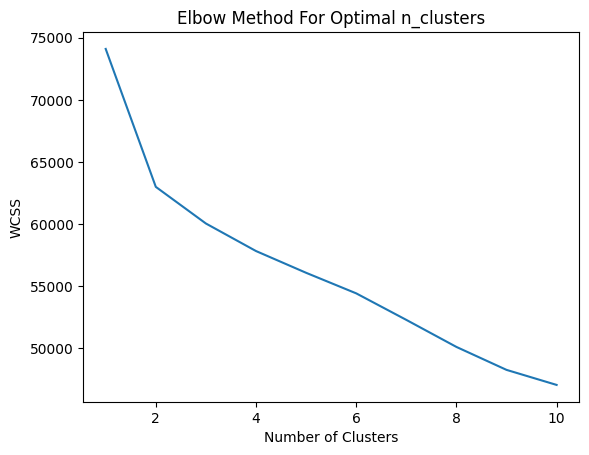

In [25]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method For Optimal n_clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(datascaled)

KMeans(n_clusters=2, random_state=42)

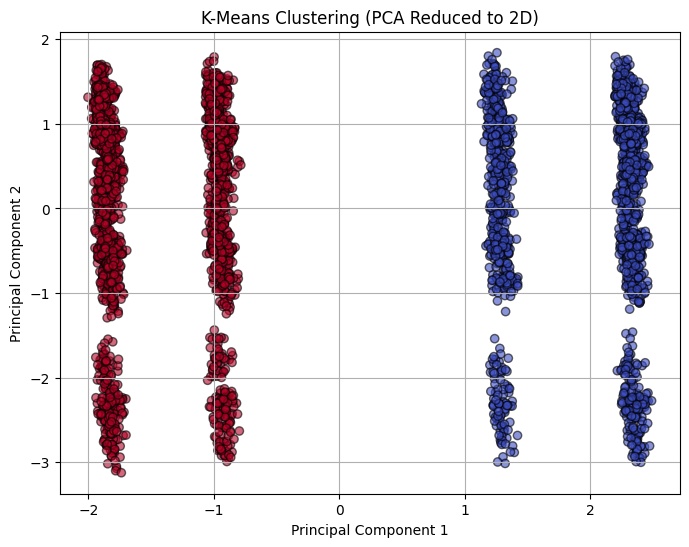

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Predict cluster labels
labels = kmeans.predict(datascaled)

# Reduce to 2D with PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(datascaled)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='coolwarm', alpha=0.6, edgecolor='k')
plt.title("K-Means Clustering (PCA Reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


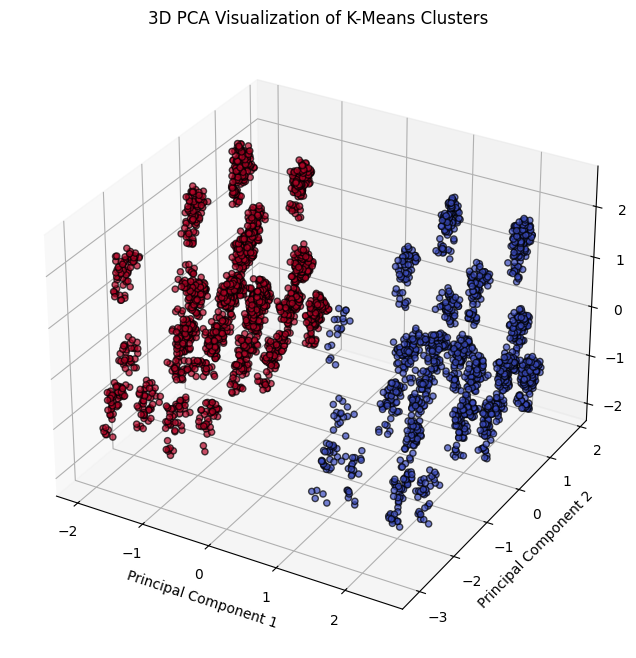

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

# Reduce to 3D using PCA
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(datascaled)

# Predict cluster labels
labels = kmeans.predict(datascaled)

# Plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 3D PCA
scatter = ax.scatter(
    data_pca_3d[:, 0],  # PC1
    data_pca_3d[:, 1],  # PC2
    data_pca_3d[:, 2],  # PC3
    c=labels, cmap='coolwarm', alpha=0.7, edgecolor='k'
)

ax.set_title("3D PCA Visualization of K-Means Clusters")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.show()


In [29]:
newdata = data.iloc[:,[1,2,8]]
newdata

,Gender,Purchase Amount (USD),Frequency of Purchases
0,1,53,4
1,1,64,4
2,1,73,5
3,1,90,5
4,1,49,1
...,...,...,...
3895,0,28,5
3896,0,49,4
3897,0,33,2
3898,0,77,5


In [30]:
newdatascaled = scaler.fit_transform(newdata)

In [31]:
wcss2=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(newdatascaled)
  wcss2.append(kmeans.inertia_)

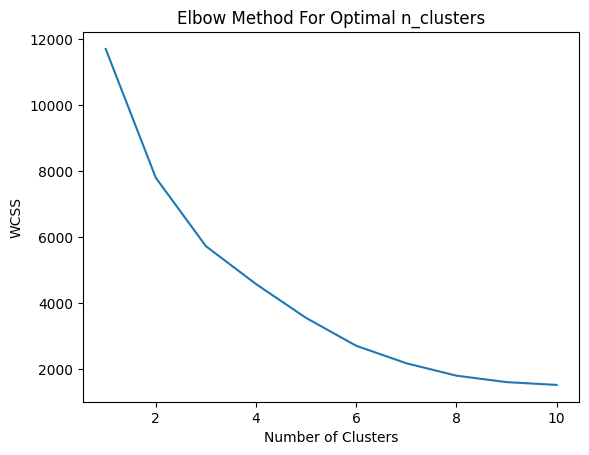

In [32]:
plt.plot(range(1,11), wcss2)
plt.title('Elbow Method For Optimal n_clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(newdatascaled)

KMeans(n_clusters=3, random_state=42)

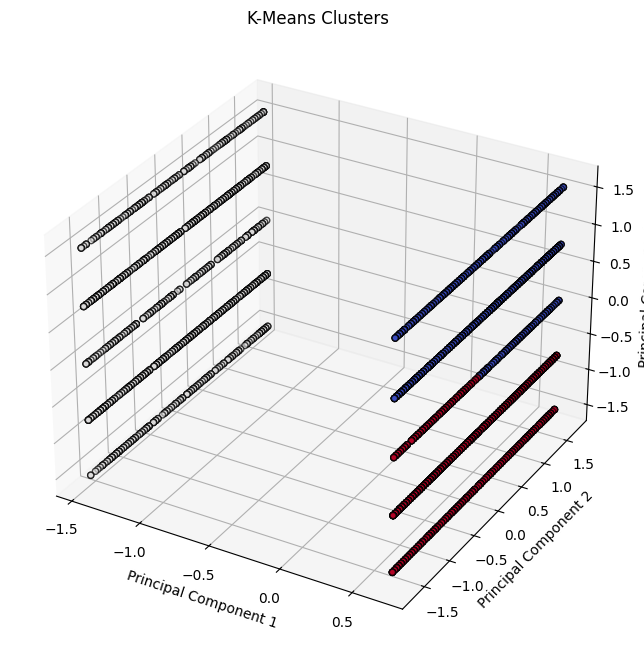

In [34]:
labels = kmeans.predict(newdatascaled)

# Plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 3D PCA
scatter = ax.scatter(
    newdatascaled[:, 0],  # PC1
    newdatascaled[:, 1],  # PC2
    newdatascaled[:, 2],  # PC3
    c=labels, cmap='coolwarm', alpha=0.7, edgecolor='k'
)

ax.set_title("K-Means Clusters")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.show()


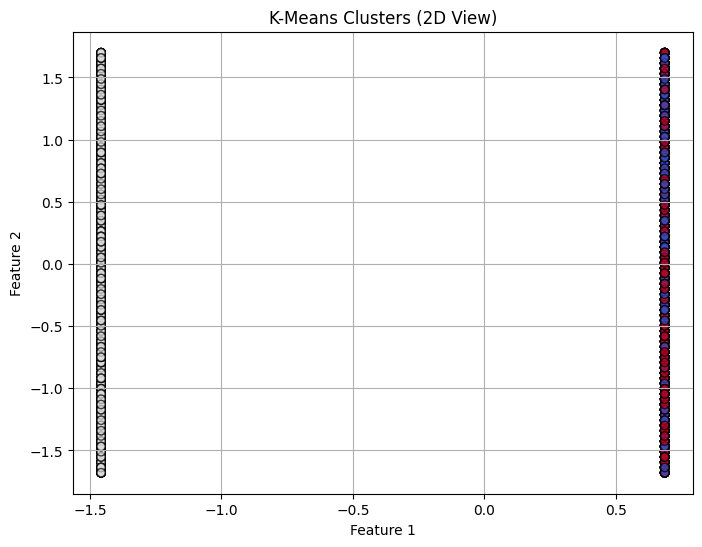

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(newdatascaled[:, 0], newdatascaled[:, 1], c=labels, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("K-Means Clusters (2D View)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

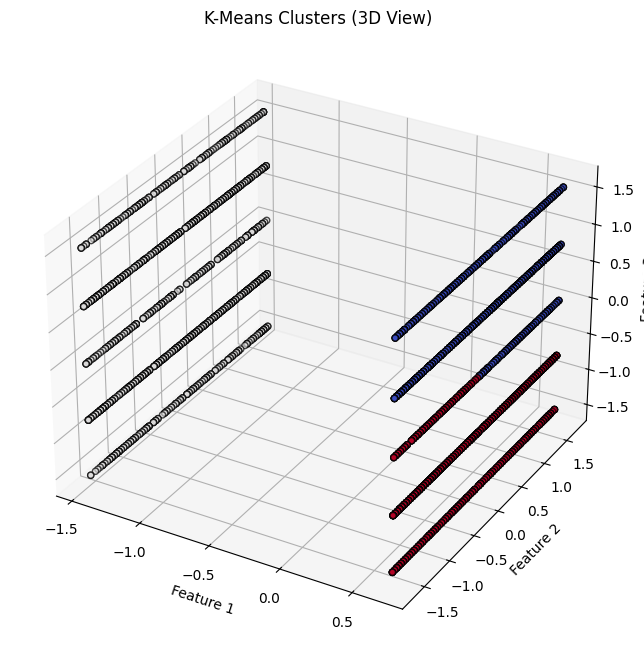

In [36]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdatascaled[:, 0], newdatascaled[:, 1], newdatascaled[:, 2],
           c=labels, cmap='coolwarm', edgecolor='k', alpha=0.7)

ax.set_title("K-Means Clusters (3D View)")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()